In [2]:
#BASE DE DATOS CLIMATOLOGICA

#ESTACION  : 26131
#NOMBRE    : NAVOJOA (FFCC)
#ESTADO    : SONORA
#MUNICIPIO : NAVOJOA
#LATITUD   : 027.081°
#LONGITUD  : -109.445°
#ALTITUD   : 41 msnm
#EMISION   : 06/04/2020

#Importamos las librerias numpy y pandas para manejo y operaciones.
import numpy as np
import pandas as pd
#Importamos seaborn y matplotlib para la visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt


#Creando el dataframe 
#Leendo el texto de Climatologia Navojoa
#Hacemos que lo lea apartir de la linea 19
#el \s significa white space y el + mas,
#por lo que \s+ significa que toma como espacio los espacios en blanco y mas
#Le damos los nombres a las columnas (podriamos no hacerlo pero se ve mejor)
df0 = pd.read_csv('ClimatologiaNavojoa.txt', skiprows=19, sep='\s+', names=["Fecha", "Precip (mm)", "Evap (mm)","Tmax (°C)","Tmin (°C)"]) 
df0.head() #leer las primeros 5 datos


,Fecha,Precip (mm),Evap (mm),Tmax (°C),Tmin (°C)
0,01/01/1931,0,Nulo,28,8
1,02/01/1931,0,Nulo,29,7
2,03/01/1931,0,Nulo,29,9
3,04/01/1931,0,Nulo,29,6
4,05/01/1931,0,Nulo,26,5


In [3]:
#Cambiamos las variables de tipo Nulo a tipo NaN para poder trabajar con ellas
#Usamos el inplace true para que el cambio se actualice en df0
df0.replace("Nulo", np.NaN, inplace=True)

In [4]:
#Como parte del EDA observamos la información de nuestro data frame
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13405 entries, 0 to 13404
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha        13405 non-null  object 
 1   Precip (mm)  13370 non-null  object 
 2   Evap (mm)    0 non-null      float64
 3   Tmax (°C)    13322 non-null  object 
 4   Tmin (°C)    13293 non-null  object 
dtypes: float64(1), object(4)
memory usage: 523.8+ KB


In [5]:
#Como podemos ver en la información de la celda anterior, la columna de evaporación
#no cuenta con ningun valor, por lo tanto será eliminada
#El axis 1 es para indicar que eliminamos una columna.
#El inplace es para mantener la modificación que acabamos de hacer
df0.drop("Evap (mm)", axis=1, inplace=True)
df0

,Fecha,Precip (mm),Tmax (°C),Tmin (°C)
0,01/01/1931,0,28,8
1,02/01/1931,0,29,7
2,03/01/1931,0,29,9
3,04/01/1931,0,29,6
4,05/01/1931,0,26,5
...,...,...,...,...
13400,28/07/1993,0,39,22
13401,29/07/1993,4.5,40,23
13402,30/07/1993,0,36,24
13403,31/07/1993,0,39,23


In [6]:
#Eliminamos la fila 13404 debido a que no nos aporta nada.
#El axis 0 es para indicar que eliminamos una fila.
#El inplace es para mantener la modificación que acabamos de hacer.
df0.drop(13404, axis=0, inplace=True)
df0

,Fecha,Precip (mm),Tmax (°C),Tmin (°C)
0,01/01/1931,0,28,8
1,02/01/1931,0,29,7
2,03/01/1931,0,29,9
3,04/01/1931,0,29,6
4,05/01/1931,0,26,5
...,...,...,...,...
13399,27/07/1993,0,39,24
13400,28/07/1993,0,39,22
13401,29/07/1993,4.5,40,23
13402,30/07/1993,0,36,24


In [7]:
#Cambiamos las columnas de precipitación, evaporación, temperatura maxima y minima a numeros flotantes
df0["Precip (mm)"]= pd.to_numeric(df0["Precip (mm)"])
df0["Tmax (°C)"]= pd.to_numeric(df0["Tmax (°C)"])
df0["Tmin (°C)"]= pd.to_numeric(df0["Tmin (°C)"]) 
#Verificamos
df0.dtypes

Fecha           object
Precip (mm)    float64
Tmax (°C)      float64
Tmin (°C)      float64
dtype: object

In [8]:
#Mostramos la estadística básica de nuestro dataframe
df0.describe()

,Precip (mm),Tmax (°C),Tmin (°C)
count,13370.000000,13322.000000,13293.000000
mean,1.015999,34.195016,14.528549
std,6.192861,6.081358,7.343251
min,0.000000,11.000000,-7.000000
25%,0.000000,30.000000,9.000000
50%,0.000000,35.000000,13.000000
75%,0.000000,39.000000,21.000000
max,254.000000,52.000000,40.000000


In [9]:
#Comenzaremos a trabajar con las fechas, por lo que crearemos una copia
df=df0.copy()
df

,Fecha,Precip (mm),Tmax (°C),Tmin (°C)
0,01/01/1931,0.0,28.0,8.0
1,02/01/1931,0.0,29.0,7.0
2,03/01/1931,0.0,29.0,9.0
3,04/01/1931,0.0,29.0,6.0
4,05/01/1931,0.0,26.0,5.0
...,...,...,...,...
13399,27/07/1993,0.0,39.0,24.0
13400,28/07/1993,0.0,39.0,22.0
13401,29/07/1993,4.5,40.0,23.0
13402,30/07/1993,0.0,36.0,24.0


In [10]:
#Cambiamos el tipo de "Fecha" a un tipo que sea reconocible como fecha para python.
df["Fecha"]= pd.to_datetime(df["Fecha"], dayfirst=True)
#Verificamos que se haya cambiado la tipología correctamente
df.dtypes

Fecha          datetime64[ns]
Precip (mm)           float64
Tmax (°C)             float64
Tmin (°C)             float64
dtype: object

In [11]:
#Creamos una columna para año y una para mes
df["Mes"]= df['Fecha'].dt.month
df["Año"]= df['Fecha'].dt.year
#Vemos el dataframe
df

,Fecha,Precip (mm),Tmax (°C),Tmin (°C),Mes,Año
0,1931-01-01,0.0,28.0,8.0,1,1931
1,1931-01-02,0.0,29.0,7.0,1,1931
2,1931-01-03,0.0,29.0,9.0,1,1931
3,1931-01-04,0.0,29.0,6.0,1,1931
4,1931-01-05,0.0,26.0,5.0,1,1931
...,...,...,...,...,...,...
13399,1993-07-27,0.0,39.0,24.0,7,1993
13400,1993-07-28,0.0,39.0,22.0,7,1993
13401,1993-07-29,4.5,40.0,23.0,7,1993
13402,1993-07-30,0.0,36.0,24.0,7,1993


In [12]:
#-----------------------------------------------------------------------------------------------------------------------------
#--------------------  Ahora nuestro objetivo es obtener los promedios mensuales de nuestras variables -----------------------
#-----------------------------------------------------------------------------------------------------------------------------



#Tomamos los meses que no se repiten y los volvemos un array
mes_unico = pd.unique(df["Mes"])
#Creamos un array agrupando los datos por cada mes
mes= df.groupby(["Mes"])
#Creamos un array vacío donde pronto estarán los valores de precipitación mensual
precip_mensual= []
Tmax_mensual= []
Tmin_mensual= []

for i in range(len(mes_unico)):
    
    #Obtenemos el grupo de datos asocioado al mes que se esté iterando
    mes_i= mes.get_group((mes_unico[i]))
    #Vamos agregando los valores de precipitación mensual promedio
    precip_mensual.append(np.mean(mes_i["Precip (mm)"]))
    #Vamos agregando los valores de temperatura máxima promedio mensual
    Tmax_mensual.append(np.mean(mes_i["Tmax (°C)"]))
    #Vamos agregando los valores de temperatura minima promedio mensual
    Tmin_mensual.append(np.mean(mes_i["Tmin (°C)"]))
    



In [13]:
#Creamos un dataframe con los datos mensuales

datos_m = {
    
    'Mes' : mes_unico,
    'Precipitacion mensual': precip_mensual,
    'Tmax mensual': Tmax_mensual,
    'Tmin mensual': Tmin_mensual
}

dfm = pd.DataFrame(datos_m)
dfm

,Mes,Precipitacion mensual,Tmax mensual,Tmin mensual
0,1,0.606265,27.084158,6.979373
1,2,0.443551,28.838938,7.473451
2,3,0.215277,31.239274,8.545301
3,4,0.011008,34.236441,10.594915
4,5,0.000925,36.686486,13.870270
5,6,0.383523,38.966696,20.997371
6,7,2.692464,38.682485,23.886109
7,8,3.696030,38.185325,23.190969
8,9,2.340299,38.190476,22.279048
9,10,0.809315,36.548624,17.554128


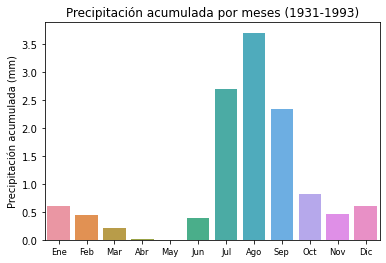

In [17]:
#Grafica de barras de la precipitación mensual promedio
sns.barplot(x=mes_unico,y=precip_mensual)
#Etiquetas en x para los meses
Meses = ('Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul','Ago','Sep','Oct','Nov','Dic')
#Tipo de etiquetas en x
N_mes = np.arange(len(mes_unico))
plt.xticks(N_mes, Meses, size = 'small')
#Etiqueta en y
plt.ylabel('Precipitación acumulada (mm)')
#Título de la tabla
plt.title('Precipitación acumulada por meses (1931-1993)')
#Mostramos la tabla
plt.show()

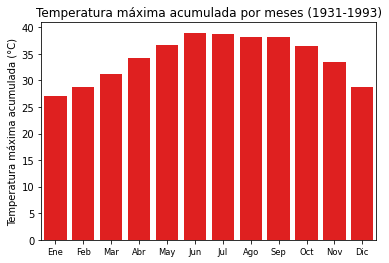

In [18]:
#Grafica de barras de la temperatura máxima mensual promedio
sns.barplot(x=mes_unico,y=Tmax_mensual,color='r')
#Etiquetas en x para los meses
Meses = ('Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul','Ago','Sep','Oct','Nov','Dic')
#Tipo de etiquetas en x
N_mes = np.arange(len(mes_unico))
plt.xticks(N_mes, Meses, size = 'small')
#Etiqueta en y
plt.ylabel('Temperatura máxima acumulada (°C)')
#Título de la tabla
plt.title('Temperatura máxima acumulada por meses (1931-1993)')
#Mostramos la tabla
plt.show()

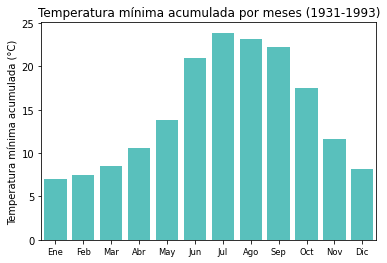

In [19]:
#Grafica de barras de la temperatura mínima mensual promedio
sns.barplot(x=mes_unico,y=Tmin_mensual,color='#48D1CC')
#Etiquetas en x para los meses
Meses = ('Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul','Ago','Sep','Oct','Nov','Dic')
#Tipo de etiquetas en x
N_mes = np.arange(len(mes_unico))
plt.xticks(N_mes, Meses, size = 'small')
#Etiqueta en y
plt.ylabel('Temperatura mínima acumulada (°C)')
#Título de la tabla
plt.title('Temperatura mínima acumulada por meses (1931-1993)')
#Mostramos la tabla
plt.show()

In [20]:
#-----------------------------------------------------------------------------------------------------------------------------
#--------------------  Ahora nuestro objetivo es obtener los promedios anuales de nuestras variables -------------------------
#-----------------------------------------------------------------------------------------------------------------------------


#Tomamos los años que no se repiten y los volvemos un array
año_unico = pd.unique(df["Año"])
#Creamos un array agrupando los datos por cada año 
año= df.groupby(["Año"])
#Creamos un array vacío donde pronto estarán los valores de precipitación anual
precip_anual= []
Tmax_anual= []
Tmin_anual= []

for i in range(len(año_unico)):
    
    #Obtenemos el grupo de datos asocioado al año que se esté iterando
    año_i = año.get_group((año_unico[i]))
    #Vamos agregando los valores de precipitación anual promedio
    precip_anual.append(np.mean(año_i["Precip (mm)"]))
    #Vamos agregando los valores de temperatura máxima promedio mensual
    Tmax_anual.append(np.mean(año_i["Tmax (°C)"]))
    #Vamos agregando los valores de temperatura minima promedio mensual
    Tmin_anual.append(np.mean(año_i["Tmin (°C)"]))



In [21]:
#Creamos un dataframe con los datos anuales

datos_a = {
    
    'Año' : año_unico,
    'Precipitacion anual': precip_anual,
    'Tmax anual': Tmax_anual,
    'Tmin anual': Tmin_anual
}

dfa = pd.DataFrame(datos_a)
dfa.head()

,Año,Precipitacion anual,Tmax anual,Tmin anual
0,1931,1.221918,37.334247,15.350685
1,1932,0.494536,36.581169,11.711039
2,1933,0.397143,37.588571,14.911429
3,1934,0.879452,38.767123,15.879452
4,1935,1.284932,37.509589,15.673973


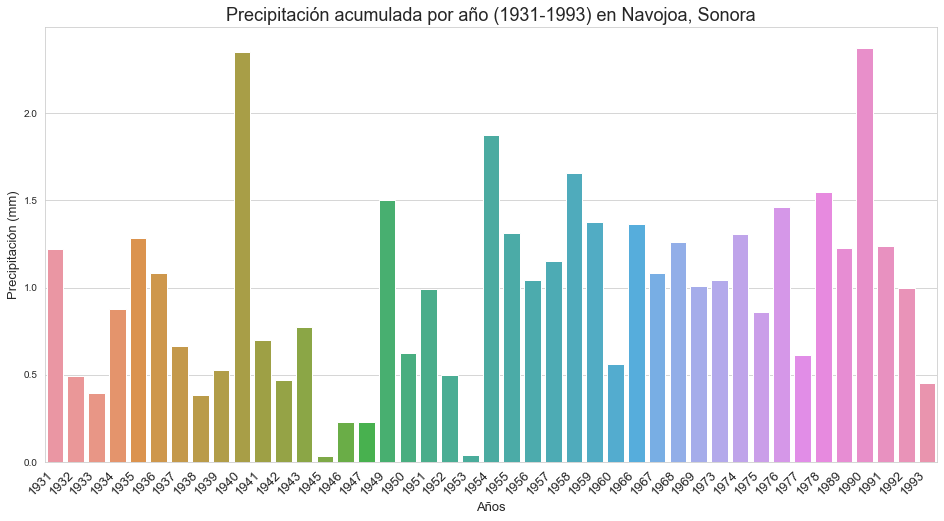

In [93]:
#Grafica de barras de la precipitación anual promedio
#Preparamos el entorno
sns.set_style('whitegrid')
#Esta gráfica en particular la haremos mas grande para mejorar la visualización
#debido a la cantidad de años con los que contamos
plt.figure(figsize=(16,8))
#Tipo de etiquetas en x
g=sns.barplot(x=año_unico, y=precip_anual, data=dfa);
# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=13);

plt.xlabel('Años', fontsize=13)
#Etiqueta en y
plt.ylabel('Precipitación (mm)', fontsize=13)
#Título de la tabla
plt.title('Precipitación acumulada por año (1931-1993) en Navojoa, Sonora', fontsize=18)
#Mostramos la tabla
plt.show()

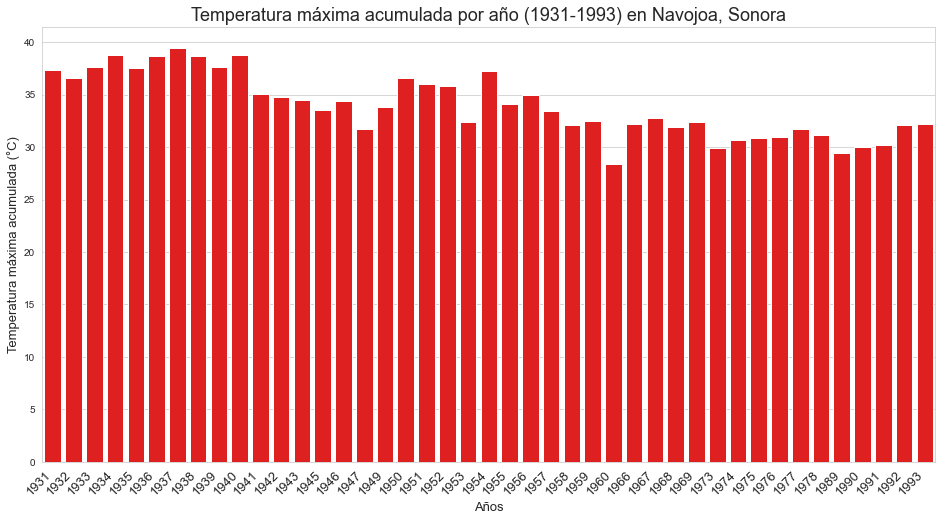

In [94]:
#Grafica de barras de la temperatura máxima anual promedio
#Preparamos el entorno
sns.set_style('whitegrid')
#Esta gráfica en particular la haremos mas grande para mejorar la visualización
#debido a la cantidad de años con los que contamos
plt.figure(figsize=(16,8))
#Tipo de etiquetas en x
g=sns.barplot(x=año_unico, y=Tmax_anual, data=dfa,color='r');
# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=13);

plt.xlabel('Años', fontsize=13)
#Etiqueta en y
plt.ylabel('Temperatura máxima acumulada (°C)', fontsize=13)
#Título de la tabla
plt.title('Temperatura máxima acumulada por año (1931-1993) en Navojoa, Sonora', fontsize=18)
#Mostramos la tabla
plt.show()

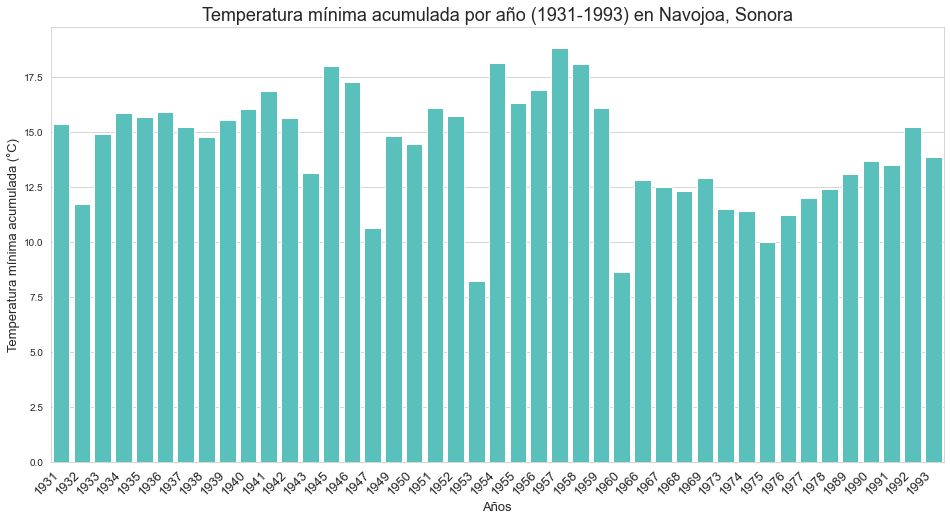

In [95]:
#Grafica de barras de la temperatura mínima anual promedio
#Preparamos el entorno
sns.set_style('whitegrid')
#Esta gráfica en particular la haremos mas grande para mejorar la visualización
#debido a la cantidad de años con los que contamos
plt.figure(figsize=(16,8))
#Tipo de etiquetas en x
g=sns.barplot(x=año_unico, y=Tmin_anual, data=df, color='#48D1CC');
# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=13);

plt.xlabel('Años', fontsize=13)
#Etiqueta en y
plt.ylabel('Temperatura mínima acumulada (°C)', fontsize=13)
#Título de la tabla
plt.title('Temperatura mínima acumulada por año (1931-1993) en Navojoa, Sonora', fontsize=18)
#Mostramos la tabla
plt.show()

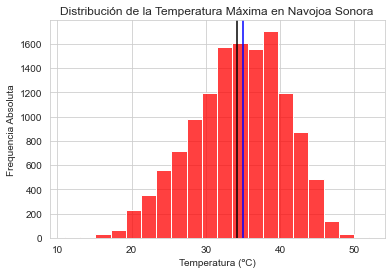

In [73]:
#Frecuencia absoluta de la Temperatura Máxima
#Preparamos el entorno para el histograma
sns.set_style("whitegrid")

#Definimos las cantidades específicas de interés: Promedio y Mediana
TMaxmed = df["Tmax (°C)"].median() 
TMaxprom = df["Tmax (°C)"].mean()

sns.histplot(data=df, x="Tmax (°C)", bins=20, color="r");
# Líneas verticales (roja y amarilla) ubicadas en la mediana y promedio
plt.axvline(x = TMaxmed, color = 'b', label = 'm') 
plt.axvline(x = TMaxprom, color = 'black', label = 'x')

#Etiquetas de los ejes
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Navojoa Sonora')

plt.show()


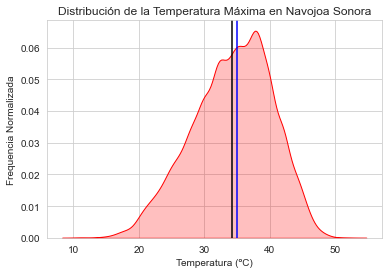

In [64]:
#Gráfica de KDE (Kernel Density Estimate)
#también conocida como gráfica de función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df["Tmax (°C)"], fill=True, color="r");
plt.axvline(TMaxmed, color = 'b'); 
plt.axvline(TMaxprom, color = 'black');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Navojoa Sonora')

plt.show()

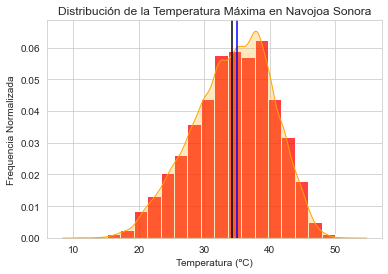

In [65]:
#Sobreponemos ambas gráficas en una sola
#Preparamos el entornonuevamente
sns.set_style("whitegrid")

sns.histplot(data=df, x="Tmax (°C)", bins=20, stat='density', color="r");
sns.kdeplot(df["Tmax (°C)"], fill=True, color="orange");

plt.axvline(TMaxmed, color = 'b'); 
plt.axvline(TMaxprom, color = 'black');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Navojoa Sonora')

plt.show()


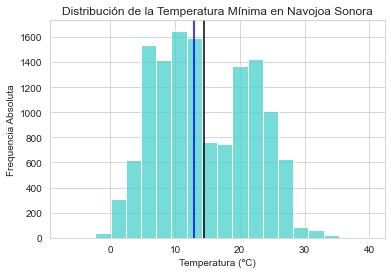

In [66]:
#Frecuencia absoluta de la Temperatura Mínima
#Preparamos el entorno para el histograma
sns.set_style("whitegrid")

#Definimos las cantidades específicas de interés: Promedio y Mediana
TMinmed = df["Tmin (°C)"].median() 
TMinprom = df["Tmin (°C)"].mean()

sns.histplot(data=df, x="Tmin (°C)", bins=20, color='#48D1CC');
# Líneas verticales (roja y amarilla) ubicadas en la mediana y promedio
plt.axvline(x = TMinmed, color = 'b', label = 'm') 
plt.axvline(x = TMinprom, color = 'black', label = 'x')

#Etiquetas de los ejes
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Navojoa Sonora')

plt.show()

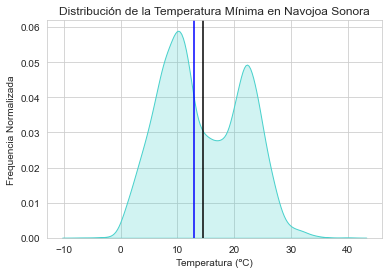

In [67]:
#Gráfica de KDE (Kernel Density Estimate)
#también conocida como gráfica de función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df["Tmin (°C)"], fill=True, color='#48D1CC');
plt.axvline(TMinmed, color = 'b'); 
plt.axvline(TMinprom, color = 'black');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Navojoa Sonora')

plt.show()

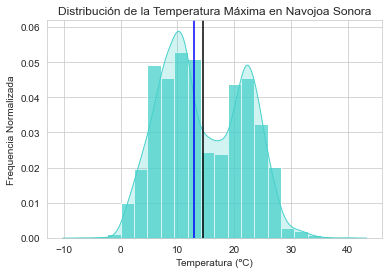

In [72]:
#Sobreponemos ambas gráficas en una sola
#Preparamos el entornonuevamente
sns.set_style("whitegrid")

sns.histplot(data=df, x="Tmin (°C)", bins=20, stat='density', color='#48D1CC');
sns.kdeplot(df["Tmin (°C)"], fill=True, color="#48D1CC");

plt.axvline(TMinmed, color = 'b'); 
plt.axvline(TMinprom, color = 'black');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Navojoa, Sonora')

plt.show()

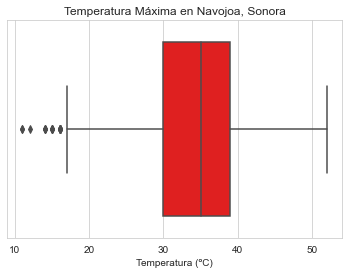

In [75]:
# Gráfica de Cajas de la temperatura máxima
#Preparamos el entorno
sns.set_style("whitegrid")
#Hacemos la grádica de caja
sns.boxplot(x=df["Tmax (°C)"], data=df, orient='h',color="red").set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en Navojoa, Sonora');

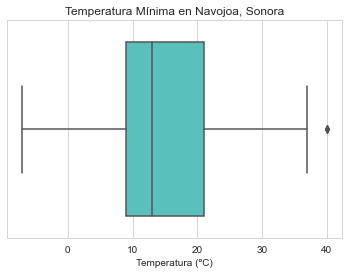

In [77]:
# Gráfica de Cajas de la temperatura mínima
#Preparamos el entorno
sns.set_style("whitegrid")
#Hacemos la grádica de caja
sns.boxplot(x=df["Tmin (°C)"], data=df, orient='h',color='#48D1CC').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Mínima en Navojoa, Sonora');